In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download behrad3d/nasa-cmaps
! unzip nasa-cmaps.zip

 41% 5.00M/12.3M [00:00<00:00, 26.3MB/s]
100% 12.3M/12.3M [00:00<00:00, 43.8MB/s]
Archive:  nasa-cmaps.zip
  inflating: CMaps/Damage Propagation Modeling.pdf  
  inflating: CMaps/RUL_FD001.txt     
  inflating: CMaps/RUL_FD002.txt     
  inflating: CMaps/RUL_FD003.txt     
  inflating: CMaps/RUL_FD004.txt     
  inflating: CMaps/readme.txt        
  inflating: CMaps/test_FD001.txt    
  inflating: CMaps/test_FD002.txt    
  inflating: CMaps/test_FD003.txt    
  inflating: CMaps/test_FD004.txt    
  inflating: CMaps/train_FD001.txt   
  inflating: CMaps/train_FD002.txt   
  inflating: CMaps/train_FD003.txt   
  inflating: CMaps/train_FD004.txt   
  inflating: CMaps/x.txt             


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
import math
import xgboost
import time
from tqdm import tqdm
import keras.models
import keras.layers
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import math
import shutil
import random
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import math
import xgboost # conda install py-xgboost
import time
from tqdm import tqdm

In [38]:
fd_001_train = pd.read_csv("/content/CMaps/train_FD002.txt",sep=" ",header=None)

In [39]:
fd_001_test = pd.read_csv("/content/CMaps/test_FD002.txt",sep=" ",header=None)

In [10]:
fd_001_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,0.0,0.0
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423,NaN,NaN
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500,NaN,NaN
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300,NaN,NaN
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200,NaN,NaN
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200,NaN,NaN
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100,NaN,NaN


In [11]:
fd_001_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,...,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,33991.000000,0.0,0.0
mean,127.528346,81.223647,23.975176,0.571154,94.066665,472.930049,579.591704,1418.562090,1203.086538,8.039014,...,8063.638811,9.315214,0.023141,347.938807,2229.025301,97.764616,20.839067,12.503918,NaN,NaN
std,74.144727,58.892845,14.778958,0.310998,14.217415,26.454686,37.338929,105.979169,119.039415,3.623831,...,83.829038,0.747609,0.004642,27.759465,145.235683,5.356411,9.908785,5.944582,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.410000,1245.160000,1030.090000,3.910000,...,7851.310000,8.330200,0.020000,303.000000,1915.000000,84.930000,10.180000,6.123100,NaN,NaN
25%,65.000000,34.000000,10.004600,0.250600,100.000000,449.440000,549.480000,1351.640000,1122.520000,5.480000,...,8061.375000,8.663500,0.020000,330.000000,2212.000000,100.000000,13.990000,8.407150,NaN,NaN
50%,128.000000,70.000000,25.001300,0.700000,100.000000,462.540000,555.830000,1367.370000,1134.160000,7.050000,...,8080.280000,9.303500,0.020000,334.000000,2223.000000,100.000000,14.900000,8.938800,NaN,NaN
75%,189.000000,119.000000,35.008000,0.840000,100.000000,491.190000,607.260000,1498.300000,1305.455000,10.520000,...,8125.840000,9.374500,0.030000,369.000000,2324.000000,100.000000,28.520000,17.111200,NaN,NaN
max,259.000000,367.000000,42.008000,0.842000,100.000000,518.670000,644.320000,1609.690000,1434.120000,14.620000,...,8243.100000,11.030000,0.030000,398.000000,2388.000000,100.000000,39.320000,23.614100,NaN,NaN


In [40]:
fd_001_train.drop(columns=[26,27],inplace=True)

In [41]:
fd_001_test.drop(columns=[26,27],inplace=True)

In [42]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

In [43]:
fd_001_train.columns = columns

In [44]:
fd_001_test.columns = columns

In [45]:
fd_001_train.describe()

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,266.069034,2334.557253,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,137.659507,128.068271,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,129.120000,2027.610000,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,131.520000,2387.900000,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,183.200000,2388.080000,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,371.260000,2388.170000,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,523.370000,2390.480000,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100


In [46]:
fd_001_train.drop(columns=['setting_1','setting_2','TRA','T50','P2','Nc','epr','NRc','BPR','Nf_dmd'],inplace=True)

In [47]:
#function for preparing training data and forming a RUL column with information about the remaining
# before breaking cycles
def prepare_train_data(data, factor = 0):
    df = data.copy()
    fd_RUL = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
    fd_RUL = pd.DataFrame(fd_RUL)
    fd_RUL.columns = ['unit_number','max']
    df = df.merge(fd_RUL, on=['unit_number'], how='left')
    df['RUL'] = df['max'] - df['time_in_cycles']
    df.drop(columns=['max'],inplace = True)

    return df[df['time_in_cycles'] > factor]

In [48]:
df = prepare_train_data(fd_001_train)

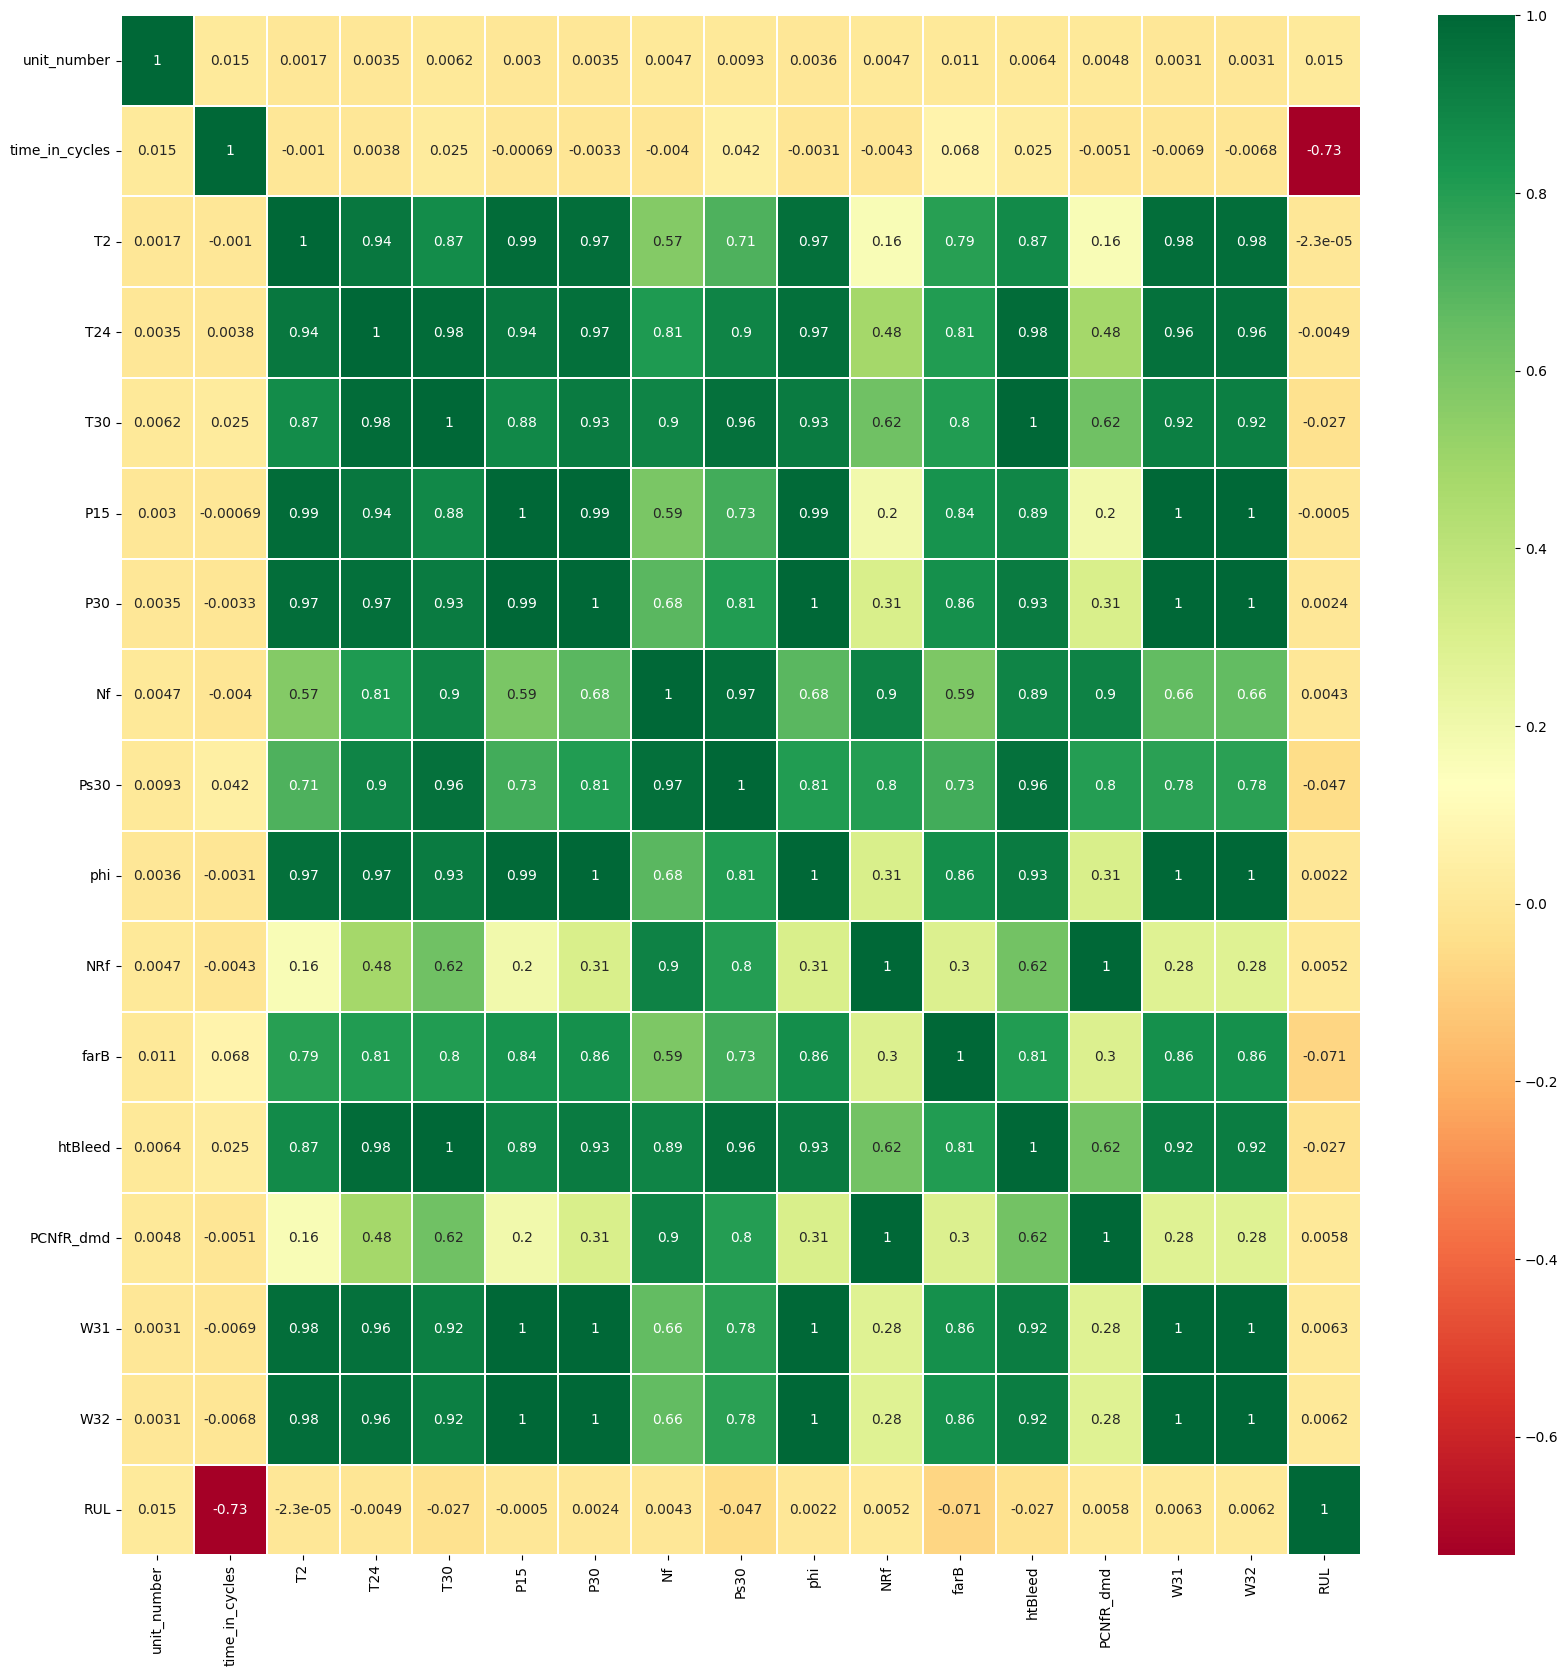

In [49]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [50]:
#Error Function for Competitive Data
def score(y_true,y_pred,a1=10,a2=13):
    score = 0
    d = y_pred - y_true
    for i in d:
        if i >= 0 :
            score += math.exp(i/a2) - 1
        else:
            score += math.exp(- i/a1) - 1
    return score

In [51]:
def score_func(y_true,y_pred):
    print(f'mean absolute error {round(mean_absolute_error(y_true,y_pred),2)}')
    print(f'root mean squared error {round(mean_squared_error(y_true,y_pred),2) ** 0.5}')
    print(f'R2 score {round(r2_score(y_true,y_pred),2)}')
    return


In [52]:
train_df = df.drop(columns = ['unit_number','P15'])

In [53]:
#function for creating and training models using the "Random forest" and "XGBoost" algorithms
def train_models(data,model = 'FOREST'):
    X = data.iloc[:,:14].to_numpy()
    Y = data.iloc[:,14:].to_numpy()
    Y = np.ravel(Y)
    if model == 'FOREST':
         #  parameters for models are selected in a similar cycle, with the introduction
         # of an additional param parameter into the function:
         #for i in range(1,11):
         #     xgb = train_models(train_df,param=i,model="XGB",)
         #     y_xgb_i_pred = xgb.predict(X_001_test)
         #     print(f'param = {i}')
         #     score_func(y_true,y_xgb_i_pred)
        model = RandomForestRegressor(n_estimators=70, max_features=7, max_depth=5, n_jobs=-1, random_state=1)
        model.fit(X,Y)
        return model
    elif model == 'XGB':
        model = xgboost.XGBRegressor(n_estimators=110, learning_rate=0.018, gamma=0, subsample=0.8,
                           colsample_bytree=0.5, max_depth=3,silent=True)
        model.fit(X,Y)
        return model
    return

In [54]:
#function for joint display of real and predicted values

def plot_result(y_true,y_pred):
    rcParams['figure.figsize'] = 12,10
    plt.plot(y_pred)
    plt.plot(y_true)
    plt.tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)
    plt.ylabel('RUL')
    plt.xlabel('training samples')
    plt.legend(('Predicted', 'True'), loc='upper right')
    plt.show()
    return

In [28]:
fd_001_test.head()

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740


In [55]:
fd_001_test.drop(columns=['setting_1','setting_2','TRA','T50','P2','Nc','epr','NRc','BPR','Nf_dmd'],inplace=True)

In [56]:
test_max = fd_001_test.groupby('unit_number')['time_in_cycles'].max().reset_index()
test_max.columns = ['unit_number','max']

In [57]:
fd_001_test = fd_001_test.merge(test_max, on=['unit_number'], how='left')

In [58]:
test = fd_001_test[fd_001_test['time_in_cycles'] == fd_001_test['max']].reset_index()

In [59]:
test.drop(columns=['index','max','unit_number','P15'],inplace = True)

In [60]:
X_001_test = test.to_numpy()

In [61]:
X_001_test.shape

(259, 14)

In [62]:
model_1 = train_models(train_df)

In [63]:
y_pred = model_1.predict(X_001_test)

In [64]:
RUL = pd.read_csv("/content/CMaps/RUL_FD002.txt",sep=" ",header=None)

In [65]:
y_true = RUL[0].to_numpy()

In [66]:
score_func(y_true, y_pred)

mean absolute error 27.19
root mean squared error 33.16338342208165
R2 score 0.62


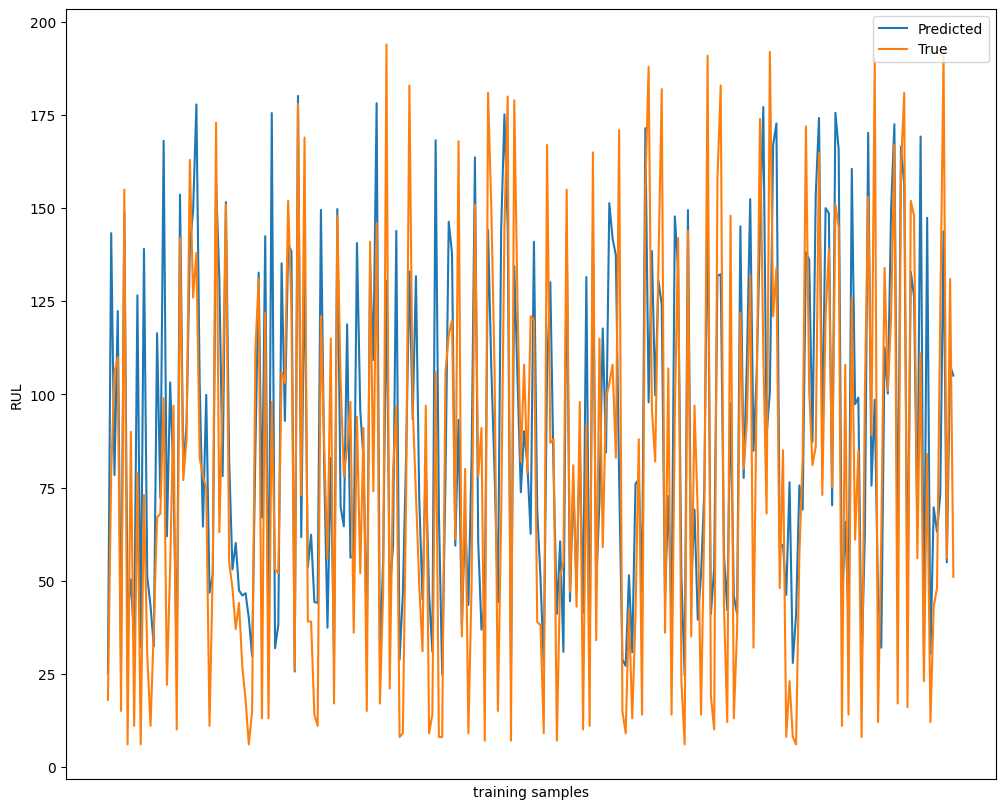

In [67]:
plot_result(y_true,y_pred)

In [70]:
# to discard values in the training array, use the factor parameter in
# prepare_train_data functions, in test_data are samples prepared for recognition, in the first column of which
# - value of time in cycles for which RUL is predicted
def single_train(test_data,train_data,algorithm):
    y_single_pred = []
    for sample in tqdm(test_data):
        time.sleep(0.01)
        single_train_df = prepare_train_data(train_data, factor = sample[0])
        single_train_df.drop(columns = ['unit_number','P15'],inplace = True)
        model = train_models(single_train_df,algorithm)
        y_p = model.predict(sample.reshape(1,-1))[0]
        y_single_pred.append(y_p)
    y_single_pred = np.array(y_single_pred)
    return y_single_pred

In [71]:
y_single_pred = single_train(X_001_test,fd_001_train,'FOREST')

100%|██████████| 259/259 [08:49<00:00,  2.04s/it]


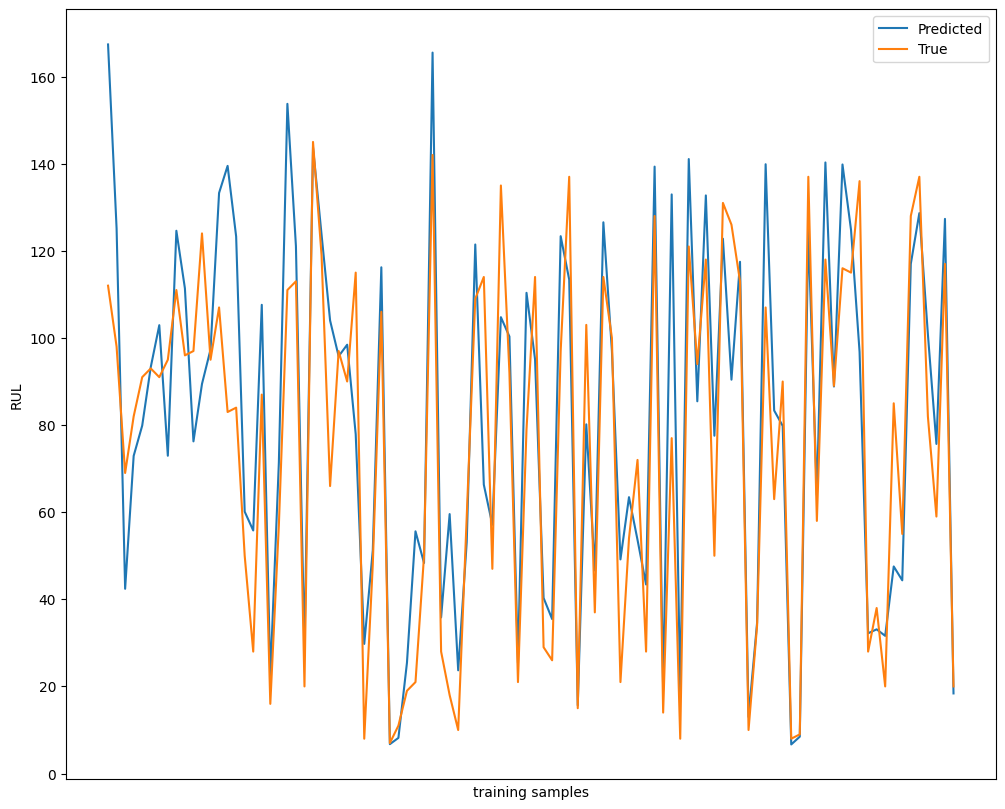

In [ ]:
plot_result(y_true,y_single_pred)

In [72]:
score_func(y_true, y_single_pred)

mean absolute error 22.95
root mean squared error 29.842251925751178
R2 score 0.69


In [75]:
def prepare_test_data(fd_001_test,n=0):
    test = fd_001_test[fd_001_test['time_in_cycles'] == fd_001_test['max'] - n].reset_index()
    test.drop(columns=['index','max','unit_number','P15'],inplace = True)
    X_return = test.to_numpy()
    return X_return

In [76]:
N=5
y_n_pred = y_single_pred
for i in range(1,N):
    X_001_test = prepare_test_data(fd_001_test,i)
    y_single_i_pred = single_train(X_001_test,fd_001_train,'FOREST')
    y_n_pred = np.vstack((y_n_pred,y_single_i_pred))

100%|██████████| 259/259 [09:18<00:00,  2.16s/it]


In [77]:
y_multi_pred = np.mean(y_n_pred,axis = 0)

In [78]:
score_func(y_true,y_multi_pred)

mean absolute error 22.74
root mean squared error 28.91470214268167
R2 score 0.71


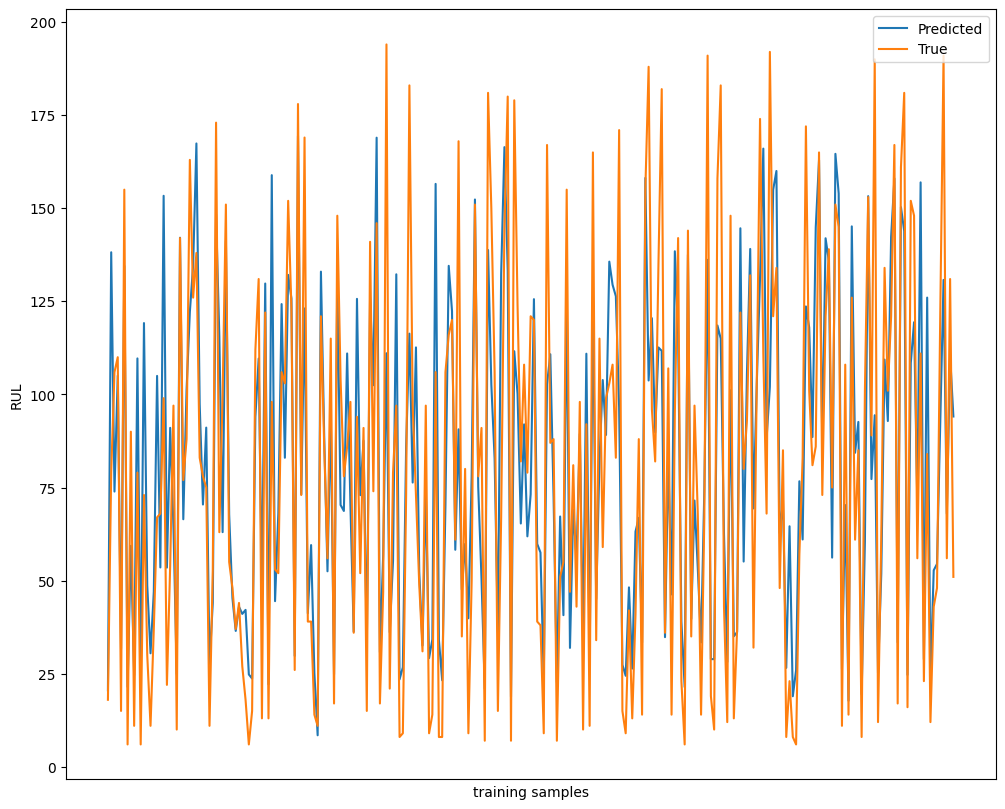

In [79]:
plot_result(y_true,y_multi_pred)

In [80]:
N=10
# In order not to recalculate the average result for 5 predictions, the stored value y_multi_pred
# is entered in y_n_pred, then the predictions for 5,6,7 .... lines from the last for the given engine
y_n_pred = y_multi_pred
for i in range(5,N):
    X_001_test = prepare_test_data(fd_001_test,i)
    y_single_i_pred = single_train(X_001_test,fd_001_train,'FOREST')
    y_n_pred = np.vstack((y_n_pred,y_single_i_pred))

100%|██████████| 259/259 [09:50<00:00,  2.28s/it]


In [81]:
y_multi_pred_10 = np.mean(y_n_pred,axis = 0)

In [82]:
score_func(y_true,y_multi_pred_10)

mean absolute error 23.61
root mean squared error 29.602364770403057
R2 score 0.7


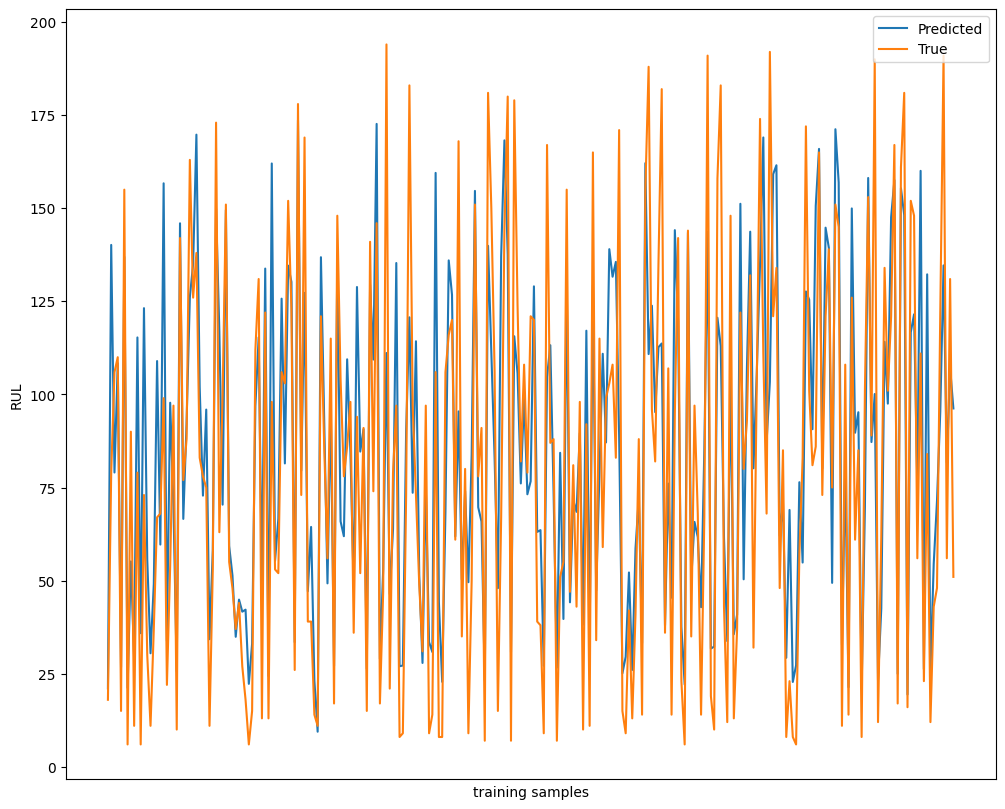

In [83]:
plot_result(y_true,y_multi_pred_10)

In [84]:
xgb = train_models(train_df,model="XGB")

In [85]:
y_xgb_pred = xgb.predict(X_001_test)

In [86]:
score_func(y_true,y_xgb_pred)

mean absolute error 30.51
root mean squared error 36.44831957717667
R2 score 0.54


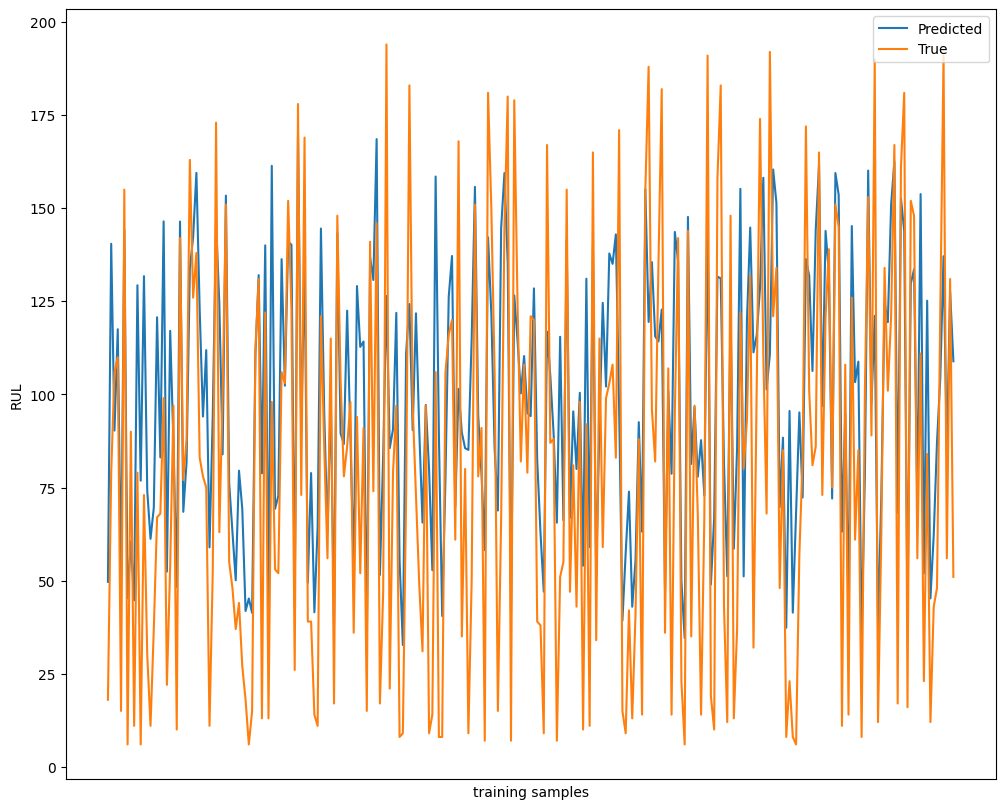

In [87]:
plot_result(y_true,y_xgb_pred)

In [88]:
y_single_xgb_pred = single_train(X_001_test,fd_001_train,'XGB')

100%|██████████| 259/259 [01:27<00:00,  2.95it/s]


In [89]:
score_func(y_true,y_single_xgb_pred)

mean absolute error 25.55
root mean squared error 32.122422075553395
R2 score 0.64


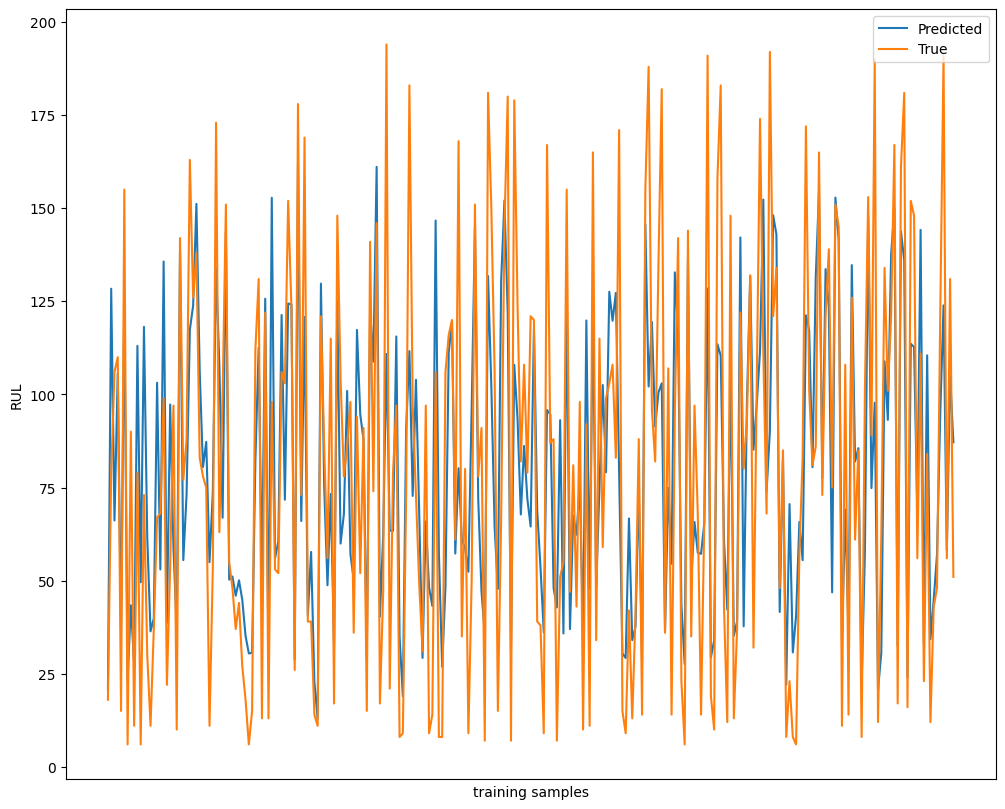

In [90]:
plot_result(y_true,y_single_xgb_pred)

In [91]:
N=5
y_n_pred = y_single_xgb_pred
for i in range(1,N):
    X_001_test = prepare_test_data(fd_001_test,i)
    y_single_i_pred = single_train(X_001_test,fd_001_train,'XGB')
    y_n_pred = np.vstack((y_n_pred,y_single_i_pred))

100%|██████████| 259/259 [01:32<00:00,  2.81it/s]


In [92]:
y_5_pred_xgb = np.mean(y_n_pred,axis = 0)

In [93]:
score_func(y_true,y_5_pred_xgb)

mean absolute error 24.67
root mean squared error 31.30543083875384
R2 score 0.66


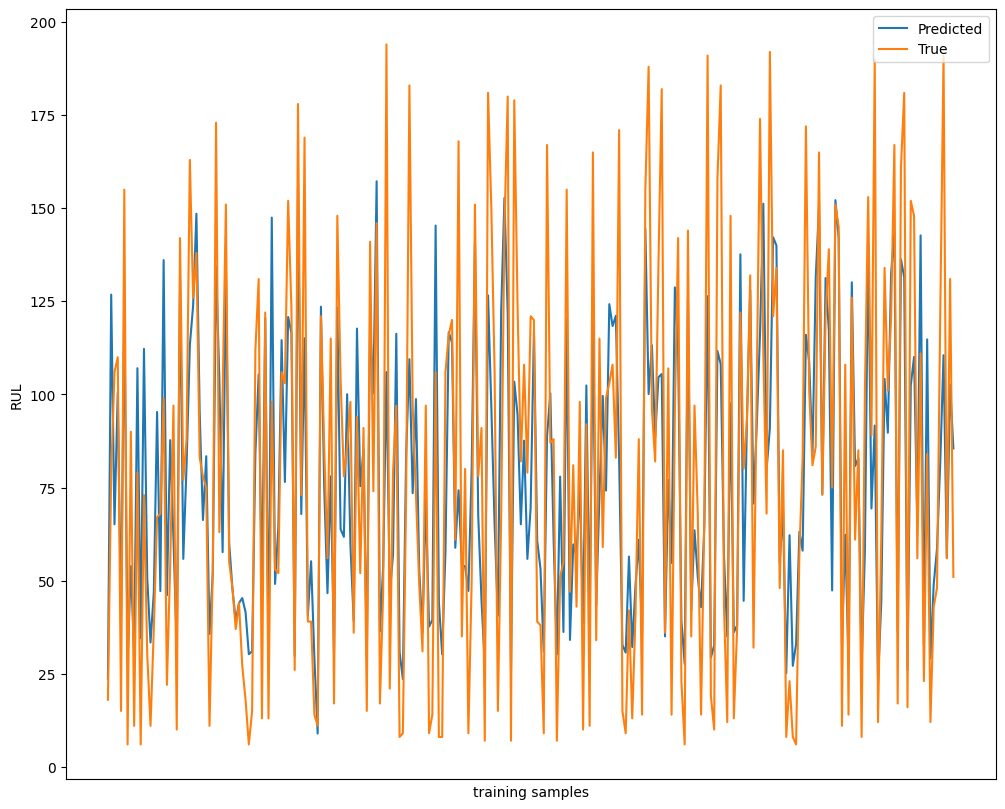

In [94]:
plot_result(y_true,y_5_pred_xgb)

In [95]:
compare = pd.DataFrame(list(zip(y_true, y_pred, y_single_pred,y_multi_pred,y_multi_pred_10,y_xgb_pred,y_single_xgb_pred)),
               columns =['True','Forest_Predicted','Forest_Single_predicted','multi_5','multi_10'
                         ,'XGBoost','XGBoost_single'])
compare['unit_number'] = compare.index + 1

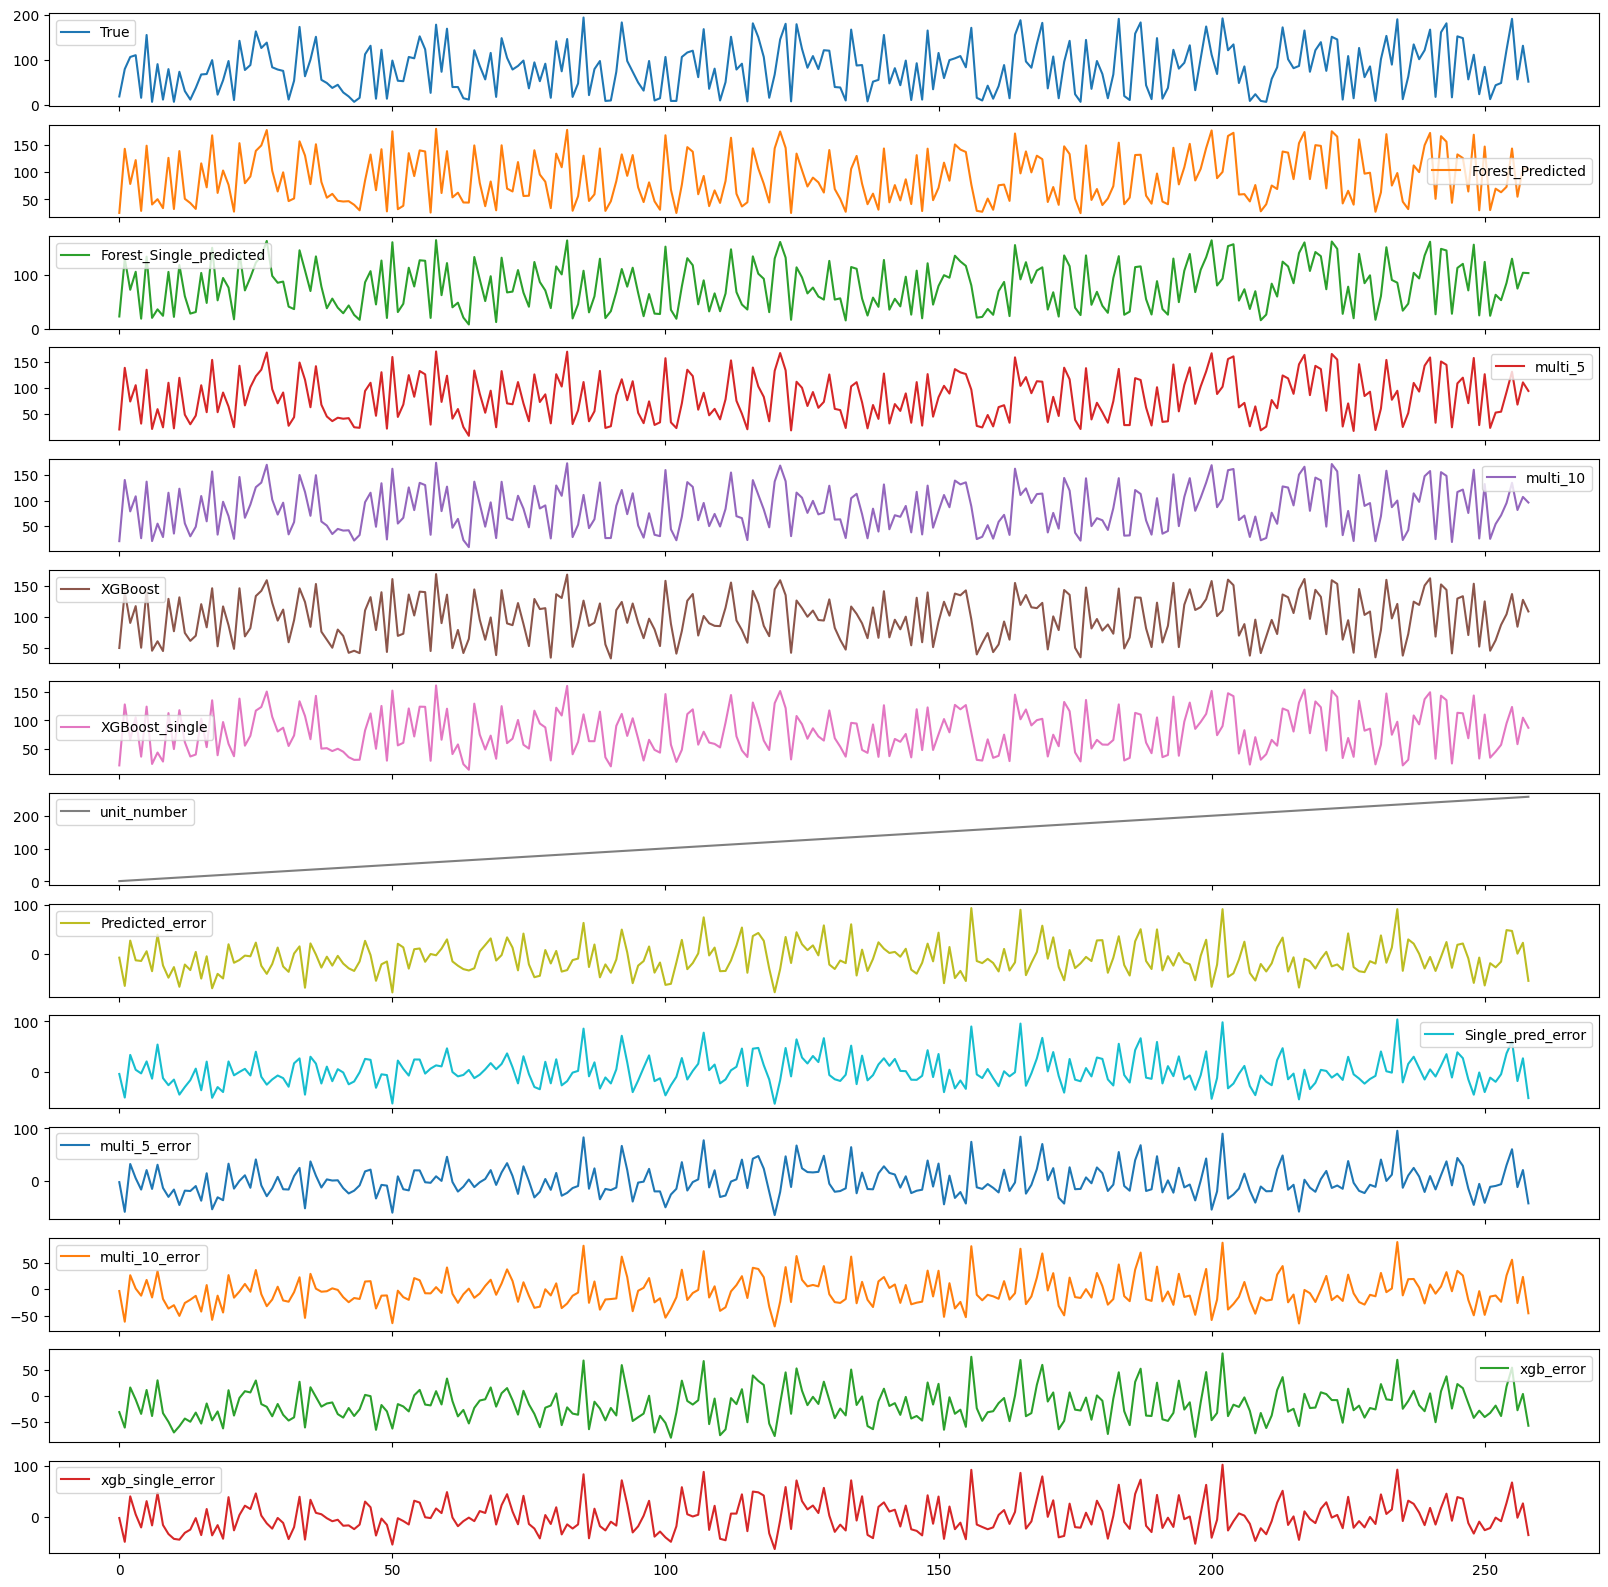

In [96]:
compare['Predicted_error'] = compare['True'] - compare['Forest_Predicted']
compare['Single_pred_error'] = compare['True'] - compare['Forest_Single_predicted']
compare['multi_5_error'] = compare['True'] - compare['multi_5']
compare['multi_10_error'] = compare['True'] - compare['multi_10']
compare['xgb_error'] = compare['True'] - compare['XGBoost']
compare['xgb_single_error'] = compare['True'] - compare['XGBoost_single']
ax1 = compare.plot(subplots=True, sharex=True, figsize=(20,20))

In [97]:
TTF = 10
train_df['label'] = np.where(train_df['RUL'] <= TTF, 1, 0 )

In [98]:
train_df.head()

,time_in_cycles,T2,T24,T30,P30,Nf,Ps30,phi,NRf,farB,htBleed,PCNfR_dmd,W31,W32,RUL,label
0,1,449.44,555.32,1358.61,194.64,2222.65,42.02,183.06,2387.72,0.02,334,100.00,14.73,8.8071,148,0
1,2,445.00,549.90,1353.22,138.51,2211.57,42.20,130.42,2387.66,0.02,330,100.00,10.41,6.2665,147,0
2,3,462.54,537.31,1256.76,175.71,1915.11,36.69,164.22,2028.03,0.02,309,84.93,14.08,8.6723,146,0
3,4,445.00,549.51,1354.03,138.46,2211.58,41.96,130.72,2387.61,0.02,329,100.00,10.59,6.4701,145,0
4,5,462.54,537.07,1257.71,175.05,1915.10,36.89,164.31,2028.00,0.02,309,84.93,14.13,8.5286,144,0


In [100]:
# exclude the RUL property and form an array of attributes and the target variable
X_class = train_df.iloc[:,:14].to_numpy()
Y_class = train_df.iloc[:,15:].to_numpy()
Y_class = np.ravel(Y_class)

In [101]:
# Class balancing to improve classifier performance
from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(random_state=0)
ros.fit(X_class, Y_class)
X_resampled, y_resampled = ros.fit_resample(X_class, Y_class)
print(len(X_class))
print(len(X_resampled))

53759
101798


In [102]:
#
# Here we divide the data into the training sample and the test one,
#test_size = 0.2 sets the proportion of the test sample = 20%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size = 0.2,random_state = 3)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [104]:
forest = RandomForestClassifier(n_estimators=70 ,max_depth = 8, random_state=193)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=70, random_state=193)

In [105]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [107]:
def classificator_score(y_,y_p):
    print(f' accuracy score {round(accuracy_score(y_, y_p),2)}')
    print(f' precision score {round(precision_score(y_, y_p),2)}')
    print(f' recall score {round(recall_score(y_, y_p),2)}')
    print(f' F1 score {round(f1_score(y_, y_p),2)}')
    return

In [108]:
classificator_score(y_test,forest.predict(X_test))

 accuracy score 0.96
 precision score 0.93
 recall score 1.0
 F1 score 0.96


In [109]:
y_xgb_pred = model_xgb.predict(X_001_test)
classificator_score(y_test,model_xgb.predict(X_test))

 accuracy score 0.98
 precision score 0.97
 recall score 1.0
 F1 score 0.98


In [110]:
test.head()

,time_in_cycles,T2,T24,T30,P30,Nf,Ps30,phi,NRf,farB,htBleed,PCNfR_dmd,W31,W32
0,258,489.05,605.42,1515.00,393.58,2319.11,45.89,370.87,2388.32,0.03,371,100.0,28.30,17.0934
1,55,518.67,642.67,1591.67,553.36,2388.17,47.43,521.10,2388.12,0.03,393,100.0,38.82,23.3463
2,165,449.44,555.86,1370.62,194.58,2222.96,41.91,183.11,2388.07,0.02,332,100.0,14.75,8.9589
3,86,491.19,607.99,1487.94,334.39,2324.07,44.48,314.88,2388.12,0.02,365,100.0,24.22,14.6814
4,148,445.00,550.81,1358.95,138.42,2212.90,42.43,130.82,2389.06,0.02,333,100.0,10.34,6.3601


In [111]:
X_001_test = test.to_numpy()

In [114]:
predicted = pd.DataFrame()
predicted ['forest'] =  forest.predict(X_001_test)
predicted['XGB'] = y_xgb_pred
predicted['RUL']=RUL[0]
predicted['true_label'] = np.where(y_true <= TTF, 1, 0 )
predicted['unit_number'] = predicted.index + 1

In [115]:
predicted.head()

,forest,XGB,RUL,true_label,unit_number
0,1,1,18,0,1
1,0,0,79,0,2
2,0,0,106,0,3
3,0,0,110,0,4
4,1,0,15,0,5


In [116]:
predicted[predicted['true_label'] == 1]

,forest,XGB,RUL,true_label,unit_number
6,1,1,6,1,7
10,1,1,6,1,11
21,1,0,10,1,22
43,1,0,6,1,44
89,1,0,8,1,90
90,1,1,9,1,91
98,1,1,9,1,99
101,1,0,8,1,102
102,1,1,8,1,103
110,1,0,9,1,111


In [117]:
# engines for which the RandomForest classification algorithm gave incorrect predictions
predicted[predicted['true_label'] != predicted['forest']]

,forest,XGB,RUL,true_label,unit_number
0,1,1,18,0,1
4,1,0,15,0,5
8,1,0,11,0,9
13,1,1,11,0,14
38,1,0,48,0,39
41,1,0,27,0,42
44,1,0,15,0,45
49,1,0,13,0,50
57,1,0,26,0,58
63,1,1,14,0,64


In [118]:
predicted[predicted['true_label'] != predicted['XGB']]

,forest,XGB,RUL,true_label,unit_number
0,1,1,18,0,1
13,1,1,11,0,14
21,1,0,10,1,22
31,0,1,11,0,32
43,1,0,6,1,44
63,1,1,14,0,64
64,1,1,11,0,65
79,1,1,15,0,80
89,1,0,8,1,90
101,1,0,8,1,102


In [119]:
y_true_class = np.where(y_true <= TTF, 1, 0 )
y_pred_class = predicted['forest'].tolist()

In [120]:
def expected_profit(y_true,y_pred):
    TP=0
    FP=0
    TN=0
    FN=0
    for i in range(len(y_true)):
        if (y_true[i] != y_pred[i]) & (y_pred[i] == 1):
            FP += 1
        elif (y_true[i] != y_pred[i]) & (y_pred[i] == 0):
            FN += 1
        elif (y_true[i] == y_pred[i]) & (y_pred[i] == 0):
            TN += 1
        else:
            TP += 1
    print(f'TP ={TP}, TN = {TN}, FP = {FP}, FN = {FN}')
    print (f'{(300 * TP - 200 * FN - 100 * FP) * 1000}')
    return

In [121]:
expected_profit(y_true_class,y_pred_class)

TP =22, TN = 205, FP = 32, FN = 0
3400000


In [122]:
expected_profit(y_true_class,y_xgb_pred)

TP =17, TN = 224, FP = 13, FN = 5
2800000


# END